In [1]:
################################## import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
################################## data in np array
X = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]).reshape(-1, 1)
y = np.array([7.5, 10.2, 12.8, 14.5, 15.6, 16.0, 15.8, 15.0, 13.5, 11.2])

<Figure size 800x500 with 0 Axes>

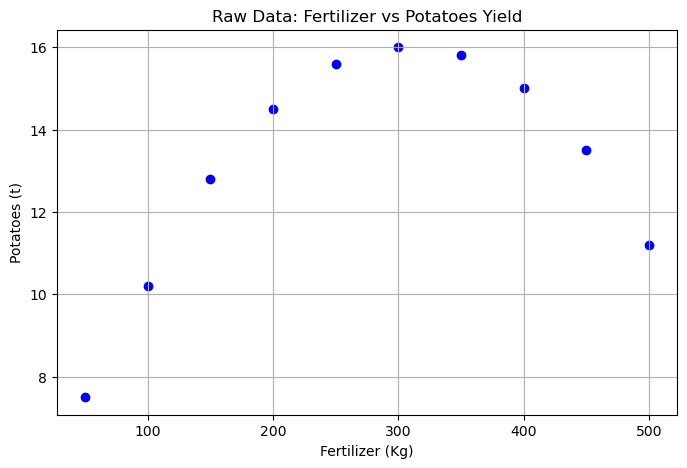

In [3]:
################################## scatter plot
plt.figure(figsize=(8, 5))
# create scatter plot of the points
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label='Actual data', color='blue')
plt.xlabel("Fertilizer (Kg)")
plt.ylabel("Potatoes (t)")
plt.title("Raw Data: Fertilizer vs Potatoes Yield")
plt.grid(True)

In [19]:
## train-test
# linear
################################## create the model - linear regression + fit + predict

## poly 2nd level
## bonus -- 2nd 3rd 4th level -- check evaluation

# features generator
# pipeline
# 1 x x^2
polynomial_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

polynomial_model.fit(X_train, y_train)
y_pred_linear_train = polynomial_model.predict(X_train)
y_pred_linear_test = polynomial_model.predict(X_test)

### evaluation
# MAE
# MSE
# RMSE
# R^2
# ADJ R
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def adjusted_r2(r2, n, p):
    mone = (1 - r2) * (n - 1)
    mehane = (n - p - 1)
    return 1 - (mone / mehane)

#### train

def print_evaluation(y_calc, true_y, msg):
    mse_linear = mean_squared_error(true_y, y_calc)
    mae_linear = mean_absolute_error(true_y, y_calc)
    rmse_linear = np.sqrt(mse_linear)
    r2_linear = r2_score(true_y, y_calc)
    print(f"{msg} MSE       : {mse_linear:.6f}")
    print(f"{msg} MAE       : {mae_linear:.6f}")
    print(f"{msg} RMSE      : {rmse_linear:.6f}")
    print(f"{msg} R^2       : {r2_linear:.6f}")

print_evaluation(y_pred_linear_train, y_train, 'train')

adj_r2 = adjusted_r2(r2_linear, n=len(y_train), p=X.shape[1])
print(f"train ADJ R^2   : {adj_r2:.6f}")

#### test

print()
print_evaluation(y_pred_linear_test, y_test, 'test')




train MSE       : 0.001543
train MAE       : 0.031774
train RMSE      : 0.039279
train R^2       : 0.999800
train ADJ R^2   : 0.999921

test MSE       : 0.027700
test MAE       : 0.129436
test RMSE      : 0.166434
test R^2       : 0.995091


In [28]:
## train-test
# polyfit

X = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
y = np.array([7.5, 10.2, 12.8, 14.5, 15.6, 16.0, 15.8, 15.0, 13.5, 11.2])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

coeffs_np = np.polyfit(X_train, y_train, deg=2)
poly_function = np.poly1d(coeffs_np)  # generate math function

y_pred_poly_train = poly_function(X_train)
y_pred_poly_test = poly_function(X_test)

### evaluation
# MAE
# MSE
# RMSE
# R^2
# ADJ R

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def adjusted_r2(r2, n, p):
    mone = (1 - r2) * (n - 1)
    mehane = (n - p - 1)
    return 1 - (mone / mehane)

#### train

def print_evaluation(y_calc, true_y, msg):
    mse_linear = mean_squared_error(true_y, y_calc)
    mae_linear = mean_absolute_error(true_y, y_calc)
    rmse_linear = np.sqrt(mse_linear)
    r2_linear = r2_score(true_y, y_calc)
    print(f"{msg} MSE       : {mse_linear:.6f}")
    print(f"{msg} MAE       : {mae_linear:.6f}")
    print(f"{msg} RMSE      : {rmse_linear:.6f}")
    print(f"{msg} R^2       : {r2_linear:.6f}")

print_evaluation(y_pred_poly_train, y_train, 'train')

adj_r2 = adjusted_r2(r2_linear, n=len(y_train), p=1)
print(f"train ADJ R^2   : {adj_r2:.6f}")

#### test

print()
print_evaluation(y_pred_poly_test, y_test, 'test')



train MSE       : 0.000861
train MAE       : 0.026061
train RMSE      : 0.029345
train R^2       : 0.999681
train ADJ R^2   : 0.999918

test MSE       : 0.018637
test MAE       : 0.123712
test RMSE      : 0.136519
test R^2       : 0.998207
